In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
df=load_digits()

In [5]:
dir(df)

['DESCR', 'data', 'images', 'target', 'target_names']

AxesImage(43.2,25.92;223.2x223.2) 1
AxesImage(43.2,25.92;223.2x223.2) 3
AxesImage(43.2,25.92;223.2x223.2) 5
AxesImage(43.2,25.92;223.2x223.2) 7


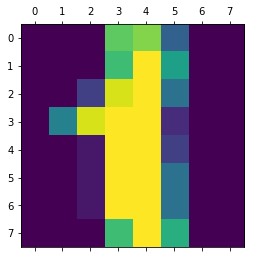

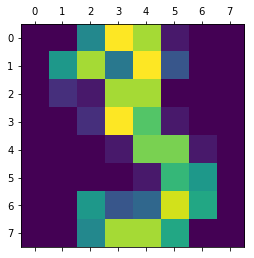

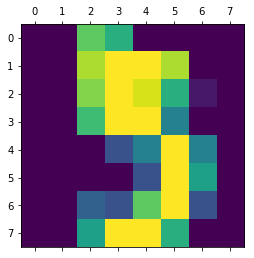

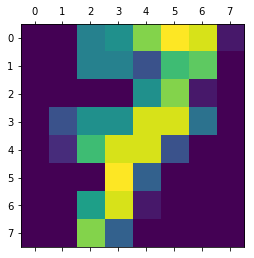

In [27]:
for i in range(1,8,2):
    print(plt.matshow(df['images'][i]),df['target'][i])

In [29]:
pd.DataFrame(df['data']).head() #for 1 image the matrix representation(8*8)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [21]:
pd.DataFrame(df['target']).head()

,0
0,0
1,1
2,2
3,3
4,4


In [12]:
len(df['data'])

1797

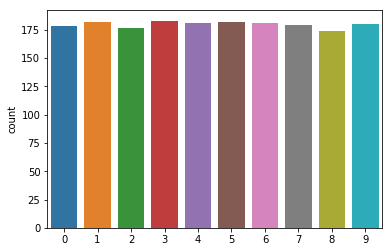

In [23]:
sns.countplot(df['target'])  #it is a balanced dataset of all 10 digits..so we can use accuracy score as our metric

In [34]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
var_models={
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear','poly']
        }
    },
    'Logistic':{
         'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    'Gaussian':{
         'model':GaussianNB(),
        'params':{}
    },
    'Multinomial':{
         'model':MultinomialNB(),
        'params':{}
    },
    'Randomforest':{
         'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[5,10,20]
        }
    },
    'Decisiontree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion': ['gini','entropy']
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,3,5,7]
        }
    }
}

In [36]:
from sklearn.model_selection import GridSearchCV,train_test_split

In [42]:
answers=[]
for modelname,modelconfig in var_models.items():
    clsf=GridSearchCV(modelconfig['model'],modelconfig['params'],cv=5, return_train_score=False)
    clsf.fit(df.data, df.target)
    answers.append({
        'model_name':modelname,
        'best_params':clsf.best_params_,
        'best_score':clsf.best_score_
    })

C:\Users\LRG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LRG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LRG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LRG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The 

In [43]:
pd.DataFrame(answers)

,model_name,best_params,best_score
0,SVM,"{'C': 1, 'kernel': 'poly'}",0.969950
1,Logistic,{'C': 1},0.920979
2,Gaussian,{},0.806344
3,Multinomial,{},0.871452
4,Randomforest,{'n_estimators': 20},0.922092
5,Decisiontree,{'criterion': 'entropy'},0.797997
6,knn,{'n_neighbors': 3},0.966055


we can see that SVM and KNN algorithms gives better accuracy

# Building KNN Model

In [39]:
selected_model=KNeighborsClassifier(n_neighbors=3)

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df['data'],df['target'],random_state=1,test_size=0.2)

In [47]:
selected_model.fit(xtrain,ytrain)
selected_model.score(xtest,ytest) 

0.9944444444444445

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,selected_model.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      1.00      1.00        29
           9       0.94      1.00      0.97        34

   micro avg       0.99      0.99      0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Text(33.0, 0.5, 'Actual')

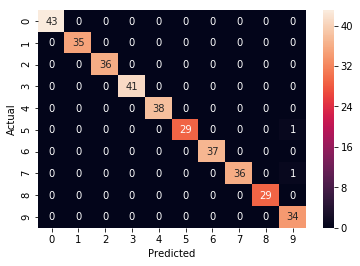

In [55]:
sns.heatmap(confusion_matrix(ytest,selected_model.predict(xtest)),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

The model is predicting wrong for  5 and 7